In [39]:
import wandb
import matplotlib.pyplot as plt



In [8]:

wandb.login()
api = wandb.Api()

In [48]:
MAX_SAMPLES = 100_000
keys = ['val/avg_contrastive_loss', 'val/avg_diversity_loss']



seisLM_base_run_paths = {
  'seislm_base': 'tliu/pretrained_seisLM/pretrain_config_std_norm_single_ax_8_datasets_sample_pick_false_42__2024-08-31-18h-41m-44s',
  'seislm_large': 'tliu/pretrained_seisLM/pretrain_config_std_norm_single_ax_8_datasets_32bit_scaleup_samp_false_42__2024-09-01-23h-26m-07s'
}


history_dict = {}
for name, path in seisLM_base_run_paths.items():
  run = api.run(path)
  history = run.history(
    samples=MAX_SAMPLES,
    keys=keys
  )

  assert len(history) <= MAX_SAMPLES
  history_dict[name] = history

In [66]:
kwargs = {
  'seislm_base': {'color': '#74c476', 'marker': '^', 'ls': '--', 'markevery': 5},
  'seislm_large': {'color': '#006d2c', 'marker': 's', 'markevery': 5}
}

Text(0.5, 1.0, 'Diversity Loss')

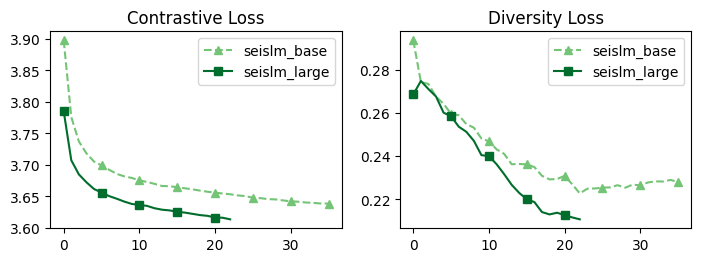

In [67]:
# plt.plot(history['val/avg_contrastive_loss'].dropna())
# fig, axes = plt.subplots(1, 2, figsize=(5, 10))

a4_width = 8.27
fig_width = a4_width
fig_height = fig_width / 2 / 1.618
marker_size = 20

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(fig_width, fig_height))


for key, val in history_dict.items():
  axes[0].plot(val['val/avg_contrastive_loss'].dropna(), label=key, **kwargs[key])
  axes[1].plot(val['val/avg_diversity_loss'].dropna(), label=key, **kwargs[key])

axes[0].legend()
axes[1].legend()

axes[0].set_title('Contrastive Loss')
axes[1].set_title('Diversity Loss')